In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def nothing(x):
    pass

In [12]:
filename = "images/child.jpg"
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

In [13]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 10, 1000, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    if(threshold <= 1):
        threshold=1
    img = cv2.imread(filename)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image',img)
cv2.destroyAllWindows()

TypeError: 'tuple' object is not callable

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(cimg, 'gray')
plt.title('Detected Circles', fontsize=25)
# plt.subplot(133),plt.imshow(img, 'gray')
# plt.title('Contour', fontsize=25)
plt.show()

In [34]:
filename = 'images/horse.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.03*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
# img[res[:,1],res[:,0]]=[0,0,255]
# img[res[:,3],res[:,2]] = [0,255,0]
# cv2.imwrite('subpixel5.png',img)

In [35]:
oimg = cv2.imread(filename)

In [36]:
for i in range(res.shape[0]):
    cv2.circle(img, (res[i,0],res[i,1]),3,(255,0,0),-1)
    cv2.circle(oimg, (res[i,2],res[i,3]),5,(0,255,0),-1)

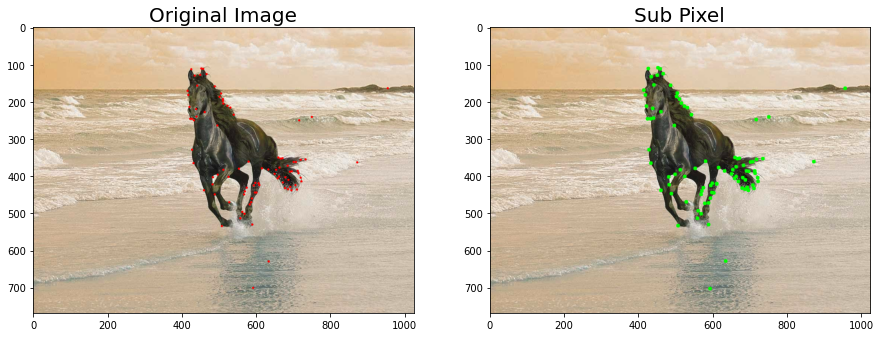

In [37]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img)
plt.title('Original Image', fontsize=20)
plt.subplot(122),plt.imshow(oimg)
plt.title('Sub Pixel', fontsize=20)
plt.show()

In [38]:
filename = 'images/horse.jpg'
img = cv2.imread(filename)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
imgsift = cv2.imread(filename)
imgsift=cv2.drawKeypoints(img,kp,imgsift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img=cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img)

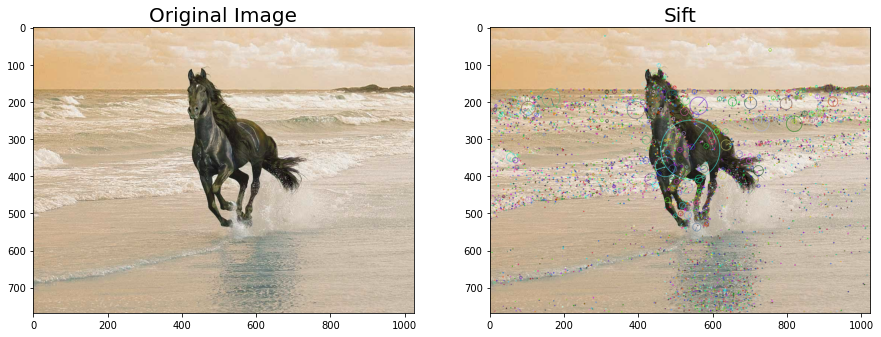

In [39]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img, 'gray')
plt.title('Original Image', fontsize=20)
plt.subplot(122),plt.imshow(imgsift, 'gray')
plt.title('Sift', fontsize=20)
plt.show()

In [18]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)


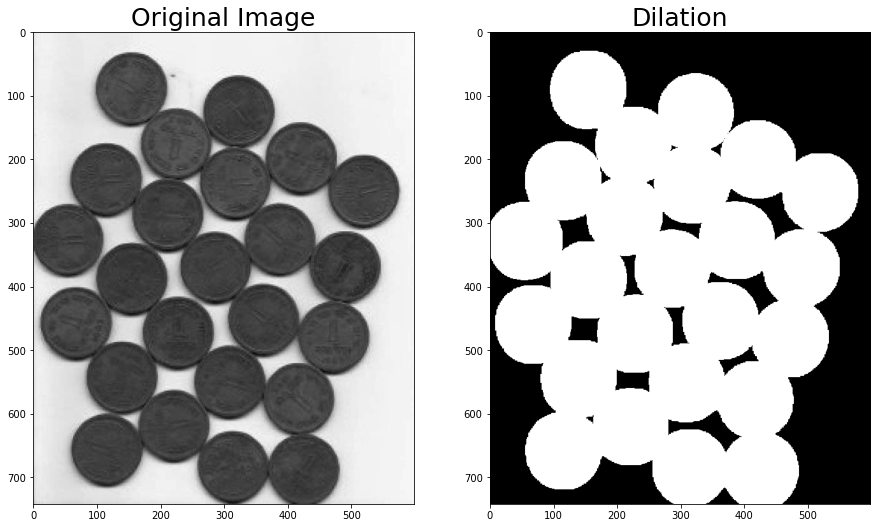

In [20]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(gray, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(sure_bg, 'gray')
plt.title('Dilation', fontsize=25)
plt.show()

In [21]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)


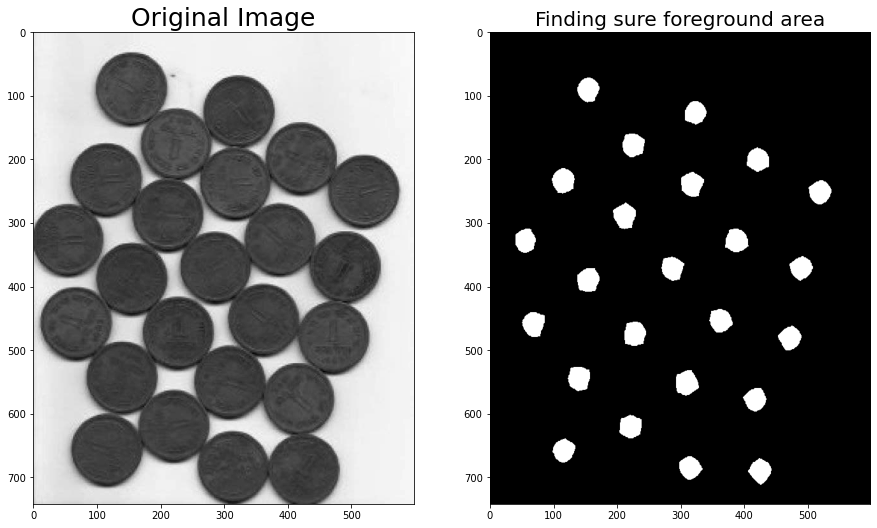

In [22]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(gray, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(sure_fg, 'gray')
plt.title('Finding sure foreground area', fontsize=20)
plt.show()

In [23]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

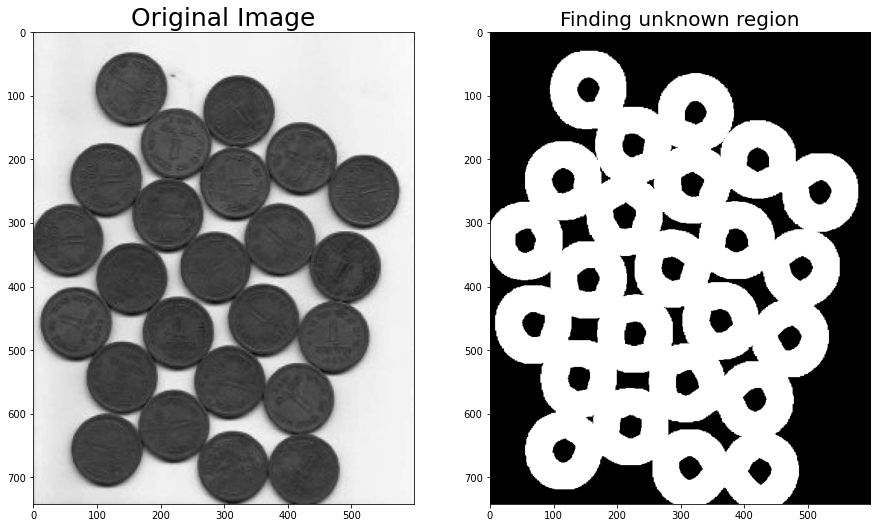

In [24]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(gray, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(unknown, 'gray')
plt.title('Finding unknown region', fontsize=20)
plt.show()

In [25]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [26]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

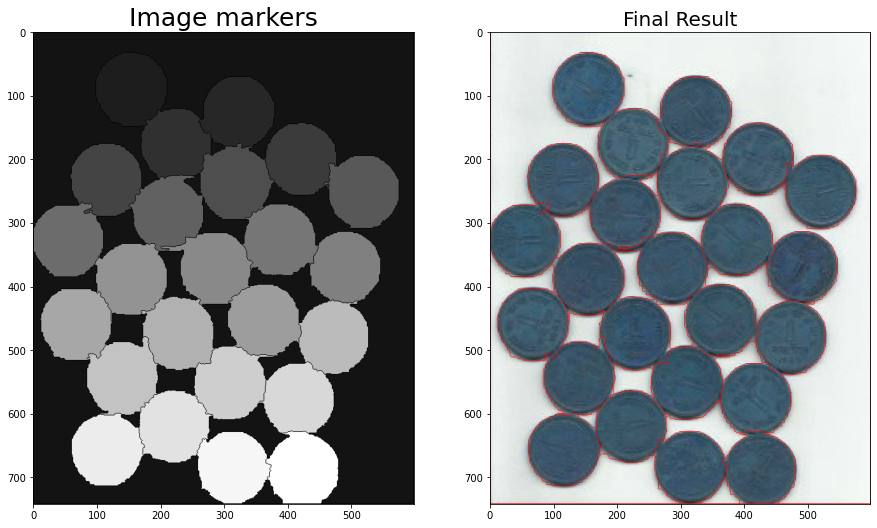

In [28]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(markers, 'gray')
plt.title('Image markers', fontsize=25)
plt.subplot(122),plt.imshow(img, 'gray')
plt.title('Final Result', fontsize=20)
plt.show()